Привет еще раз, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очередную качественную работу - видно, что приложено много усилий
* Понравилось, что ты уделяешь должное внимание выводам - это очень важный навык
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Тебе удалось справиться с задачей численных методов и достигнуть неплохих результатов, поздравляю!
* Отправляю проект назад, если у тебя появились вопросы. Если их нет, то можешь просто отправить проект еще раз и я его зачту.




In [ ]:
#%pip install -q -r requirements-ml.txt

In [ ]:
#%pip install scikit-learn==0.22.1

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### Цель исследования
Построить модель для определения стоимости автомобиля на основе исторических данных с характеристиками автомобилей.

### Ход исследования
1. Загрузка и просмотр исходных данных
2. Предобработка данных
3. Обучение различных моделей с подбором гиперпараметров
4. Анализ скорости работы и качества моделей
5. Формирование вывода

## Загрузка данных

Импортирую все необходимые модули и библиотеки, которые потребуются в исследовании данных и подготовки моделей обучения.

In [ ]:
#%pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error

import time

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Успех:</b> Описание и импорты на месте
</div>

Импортирую исходные данные методом read_csv, оформляю данные в датафрейм.

In [ ]:
try:
    data = pd.read_csv('/content/autos.csv')
except FileNotFoundError as e:
    print(e)
    data = pd.read_csv('/datasets/autos.csv')

In [ ]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

В исходных данных содержатся исторические данные: технические характеристики, комплектации и цены автомобилей. В датафрейме 16 столбцов с данными.

**Признаки**
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

**Целевой признак**
- Price — цена (евро)

## Подготовка данных

#### Изменение стиля названия колонок

Изменю наименования колонок на корректное стилистическое написание - строчными буквами. Пройдусь в цикле по каждому наименованию столбца и применю к наименованию метод lower().

In [ ]:
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [ ]:
columns_lower = []
for column in data.columns:
    columns_lower.append(column.lower())

In [ ]:
data.columns = columns_lower

#### Обработка пропущенных значений

Посмотрю, в каких колонках отстутсвуют значения в строках и посчитаю количество пропущенных значений в каждой из таких колонок.

In [ ]:
for column in data.columns:
    if data[column].isna().sum()>0:
        print(f'Количество пропущенных значений в колонке {column}: {data[column].isna().sum()}')

Количество пропущенных значений в колонке vehicletype: 37490
Количество пропущенных значений в колонке gearbox: 19833
Количество пропущенных значений в колонке model: 19705
Количество пропущенных значений в колонке fueltype: 32895
Количество пропущенных значений в колонке notrepaired: 71154


Пропуски в таких технических характеристиках, как vehicletype, gearbox, model, fueltype можно заменить самым частым значением признака в совокупности других характеристик автомобиля. Для того, чтобы осуществить замену пропусков в такой логике для каждой из колонок, я напишу цикл, который считает самое частое значение искомого признака в строкахс уникальным соединением признаков 'vehicletype', 'gearbox', 'model', 'fueltype', 'power'. Для того, чтобы совместить полученные значения с исходными данными, в которых есть пропуски в искомом значении, я установлю эту "совокупность признаков" в качестве индекса.

Есть гипотеза, что можно прогнать цикл несколько раз, так как при заполнении пропусков в одних значениях, могут появляться новые уникальные "совокупности признаков" с частым искомым признаком, который потом может заполнить пропущенные значения вновь. Для проверки этой гипотезы, я установлю счетчик counter=0 и проверю, убавляются ли пропущенные значения в признаках при втором запуске цикла.

In [ ]:
column_list = ['vehicletype', 'gearbox', 'model', 'fueltype']
counter = 0
while counter<8:
    for column in column_list:
        data[column].isna().sum()
        list_features = ['vehicletype', 'gearbox', 'model', 'fueltype']
        list_without_column = list_features.remove(column)
        print(list_features)

        column_without_null = data.dropna(subset = [column])
        column_mode = column_without_null.groupby([column_without_null[list_features[0]]+column_without_null[list_features[1]]+column_without_null[list_features[2]]+column_without_null['power'].astype('str')])[column].agg(lambda x:x.value_counts().index[0]).to_frame()
        data['concat_for_fillna'] = data[list_features[0]]+data[list_features[1]]+data[list_features[2]]+data['power'].astype('str')
        data.set_index('concat_for_fillna', inplace=True)
        data[column].fillna(column_mode[column], inplace=True)
        counter +=1
        print(data[column].isna().sum())

['gearbox', 'model', 'fueltype']
22886
['vehicletype', 'model', 'fueltype']
13030
['vehicletype', 'gearbox', 'fueltype']
10720
['vehicletype', 'gearbox', 'model']
22348
['gearbox', 'model', 'fueltype']
22886
['vehicletype', 'model', 'fueltype']
13030
['vehicletype', 'gearbox', 'fueltype']
10720
['vehicletype', 'gearbox', 'model']
22348


С помощью цикла удалось заполнить половину пропусков в каждой из колонок. Не все признаки заполнились, так как в признаках для совокупности признаков так же присутствуют пропущеныые значения. Гипотеза с убавлением пропущенных значений с прогонкой цикла несколько раз не подтвердилась. Чтобы не избавляться от строк с пропущенными значениям и не заполнять их некорректным способом, заполню их новым значением 'unknown', если срези значений признака есть тип "other", занесу пропущенные значения туда.
Для столбца notrepaired так же сделаю преобразование пропущенных значений - заполню значением 'unknown', так как невозможно понять по остальным характеристикам, была машина в ремонте или нет.

In [ ]:
data['gearbox'].value_counts()

manual    273878
auto       67461
Name: gearbox, dtype: int64

In [ ]:
data['fueltype'].value_counts()

petrol      224652
gasoline    100939
lpg           5327
cng            572
hybrid         237
other          204
electric        90
Name: fueltype, dtype: int64

In [ ]:
data['model'].value_counts()

golf                  30605
other                 25534
3er                   20823
polo                  13629
corsa                 13294
                      ...  
i3                        8
rangerover                4
serie_3                   4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 250, dtype: int64

In [ ]:
data['vehicletype'].value_counts()

sedan          96832
small          84825
wagon          66849
bus            30638
convertible    20412
coupe          16417
suv            12182
other           3328
Name: vehicletype, dtype: int64

In [ ]:
data['gearbox'] = data['gearbox'].fillna('unknown')
data['fueltype'] = data['fueltype'].fillna('other')
data['model'] = data['model'].fillna('other')
data['vehicletype'] = data['vehicletype'].fillna('other')
data['notrepaired'] = data['notrepaired'].fillna('unknown')

In [ ]:
data.isna().sum()

datecrawled          0
price                0
vehicletype          0
registrationyear     0
gearbox              0
power                0
model                0
kilometer            0
registrationmonth    0
fueltype             0
brand                0
notrepaired          0
datecreated          0
numberofpictures     0
postalcode           0
lastseen             0
dtype: int64

Пропуски заполнены, можно переходить к дубликатам.

<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски проанализированы неплохо, провелись эксперементы, что очень похвально! И заполнены допустимым способом.
</div>

#### Дубликаты

In [ ]:
data.duplicated().sum()

4

Найдено всего 4 явных дубликата, смело удалю эти строки.

In [ ]:
data = data.drop_duplicates()

#### Основные статистические показатели

In [ ]:
data.describe()

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures,postalcode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


В целевом признаке price минимальное значение - 0. Возможно, продавец выставил автомобиль бесплатно, чтобы отправить на утилизацию, либо отдать в дар на запчасти, либо еще по каким-либо причинам. Так как модель должна будет предсказывать цену выставляемого автомобиля, нулевые значения могут некорректно повлиять на предсказания модели. Поэтому я очищу датасет от аких строк. 

In [ ]:
data = data[data['price']>0]

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я тоже все-таки склоняюсь к тому, чтобы избавиться от таких данных. 

Год регистрации автомобиля так же принимает ненормальные значения на уровне максимума и минимума, автомобили изобрели в 90-х годах 19 века, поэтому минимальное значение продажи явно некорректное. Год 9999 еще не наступил, так что максимальное знаечение так же некорректно :)). Рассмотрю, какие уникальные значения есть в данном признаке.

In [ ]:
sorted(data['registrationyear'].unique())

[1000,
 1001,
 1039,
 1111,
 1234,
 1255,
 1300,
 1400,
 1500,
 1600,
 1602,
 1800,
 1910,
 1923,
 1925,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2066,
 2200,
 2222,
 2290,
 2500,
 2800,
 2900,
 3000,
 3200,
 3700,
 3800,
 4000,
 4100,
 4500,
 4800,
 5000,
 5300,
 5555,
 5600,
 5900,
 5911,
 6000,
 6500,
 7000,
 7100,
 7800,
 8000,
 8200,
 8500,
 8888,
 9000,
 9450,
 9999]

Посмотрю последнюю дату создания анкеты и очищу датасет от строк с теми датами регистрации автомобиля, где дата больше максимальной даты заполнения анкеты и меньше 1910 года (так как в предыдущую дату до 1910 - 1800 автомобили не существовали).

In [ ]:
data['datecreated'].max()

'2016-04-07 00:00:00'

In [ ]:
data['registrationmonth'][data['registrationyear']==2016].unique()

array([ 0,  6,  4,  1,  3,  9, 12, 10,  5,  8,  7, 11,  2])

Удалю сперва в 2016 году строки с месяцами после 7, так как дата создания последней анкеты была в июле 2016, регистрация автомобиля не могла быть позже. Далее удалю все года до 1910 и после 2016.

In [ ]:
data = data[~((data['registrationyear']==2016)&(data['registrationmonth']>7))]

In [ ]:
data = data[(data['registrationyear']>1909)&(data['registrationyear']<2017)]

<div class="alert alert-block alert-success">
    
<b>Успех:</b> Согласен с годами)

Значения в power так же имеют выбросы, рассмотрю распределение значений на ящике с усами.

Text(0.5, 1.0, 'Разброс значений power, л.с. (диапазон от 0 до 2000)')

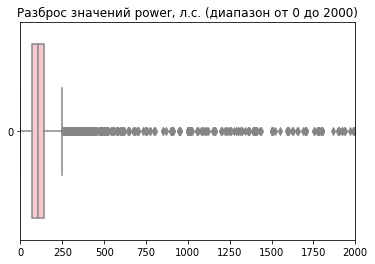

In [ ]:
ax=sns.boxplot(data = data['power'], orient='horizontal', color='pink')
ax.set_xlim([0,2000])
ax.set_title('Разброс значений power, л.с. (диапазон от 0 до 2000)')

Взяв диапазон значений для визуализации от 0 до 2000 видно, что значение нижнего и верхнего квартилей лежат в диапазоне от 50 до 150 (примерно), верхняя граница ящика с усами около 250, далее идет множество выбросов. Рассмотрю график в более узком диапазоне.

Text(0.5, 1.0, 'Разброс значений power, л.с. (диапазон от 0 до 700)')

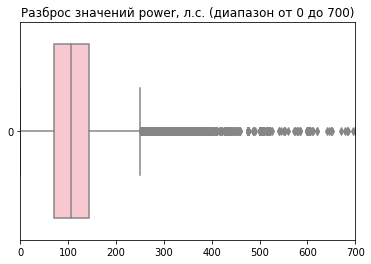

In [ ]:
ax=sns.boxplot(data = data['power'], orient='horizontal', color='pink')
ax.set_xlim([0,700])
ax.set_title('Разброс значений power, л.с. (диапазон от 0 до 700)')

Выбросы скоплены в диапазоне от 250 до 450. Лишь уникальное кол-во моделей автомобилей имеет количество лошадиных сил свыше 750 л.с. Так что большинство выбросов - это некорректно заполненные значения мощности автомобиля. Я предлагаю заменить значения power больше 700 л.с. на самые частые значения на основе "совокпуности признаков". Для этого заменю все значений power больше равно 700 на пустые значения, далее посчитаю самые частые значения power для совокупности признаков, заменю пустые значения на полученные значения.

In [ ]:
data[data['power']>700]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
concat_for_fillna,,,,,,,,,,,,,,,,
smallmanualcorolla1398,2016-03-22 20:52:00,3200,small,2004,manual,1398,corolla,5000,6,petrol,toyota,no,2016-03-22 00:00:00,0,22043,2016-03-22 21:43:26
sedanmanualcolt953,2016-04-03 20:31:00,3100,sedan,2005,manual,953,colt,150000,4,gasoline,mitsubishi,no,2016-04-03 00:00:00,0,60326,2016-04-07 14:56:46
wagonmanualastra1001,2016-03-29 19:44:48,500,wagon,1999,manual,1001,astra,150000,7,petrol,opel,unknown,2016-03-29 00:00:00,0,33154,2016-04-06 05:44:36
smallmanualpunto771,2016-03-14 15:54:34,3000,small,2009,manual,771,punto,125000,0,petrol,fiat,unknown,2016-03-14 00:00:00,0,40721,2016-03-14 15:54:34
smallmanuallupo7515,2016-04-02 19:25:25,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,unknown,2016-04-02 00:00:00,0,65830,2016-04-06 11:46:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wagonmanuala62598,2016-03-05 17:53:09,1000,wagon,1996,manual,2598,a6,150000,7,other,audi,unknown,2016-03-05 00:00:00,0,7646,2016-03-07 16:17:01
sedanmanualscenic1548,2016-03-13 11:51:57,7500,sedan,2011,manual,1548,scenic,90000,4,petrol,renault,unknown,2016-03-13 00:00:00,0,24568,2016-04-06 15:17:39
smallmanualypsilon1241,2016-04-04 18:53:25,250,small,1999,manual,1241,ypsilon,150000,5,petrol,lancia,yes,2016-04-04 00:00:00,0,28259,2016-04-04 18:53:25


In [ ]:
data.loc[data['power']>=700,'power'] = np.nan
power_less_700 = data[data['power']<700]
column_mode = power_less_700.groupby([power_less_700['vehicletype']+power_less_700['gearbox']+power_less_700['model']+power_less_700['fueltype']])['power'].agg(lambda x:x.value_counts().index[0]).to_frame()
data['concat_for_fillna'] = data['vehicletype']+data['gearbox']+data['model']+data['fueltype']
data.set_index('concat_for_fillna', inplace=True)
data['power'].fillna(column_mode['power'], inplace=True)

In [ ]:
data['power'].isna().sum()

12

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Как думаешь а машины с нулевой мощностью, могут быть без двигателя?

Строки со значениями, которые не удалось заполнить и они остались пустыми удалю. Это очень маленький процент от исходного датасета, поэтому на результат обучения это не должно повлиять.

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(327251, 16)

In [ ]:
print(f'В итоговом обработанном датафрейме получилось 327251 строк со значениями. Из исходного датасета было удалено в общей сложности {(1-327251/354369):%} строк')


В итоговом обработанном датафрейме получилось 327251 строк со значениями. Из исходного датасета было удалено в общей сложности 7.652475% строк


#### Удаление ненужных столбцов

Такие колонки как 
- datecrawled — дата скачивания анкеты из базы
- registrationmonth — месяц регистрации автомобиля
- datecreated — дата создания анкеты
- numberofpictures — количество фотографий автомобиля
- postalcode — почтовый индекс владельца анкеты (пользователя)
- lastseen — дата последней активности пользователя

не влияют на оценку стоимости автомобиля, поэтому можно их удалить из датафрейма, чтобы они не перегружали модель обучения.

In [ ]:
data = data.drop(columns = ['datecrawled','registrationmonth','datecreated','numberofpictures','postalcode','lastseen'])

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение

In [ ]:
data.shape

(327251, 10)

#### Вывод
- Таким образом, в исходном датасете представлена информация о продажах автомобилей за определенный период. В датасете представлены технические характеристики автомобиля на продажу, а так же некоторая другая информация об анкете. 
- Был обозначен целевой признак - цена автомобиля (price).
- В 5 колонках были найдены пропущенные значения. В четырех из них (для колонок 'vehicletype', 'gearbox', 'model', 'fueltype') пропущенные значения были заменены самым частым значением признака среди строк, сгруппированных по совокупным признакам 'vehicletype', 'gearbox', 'model', 'fueltype' (без искомого признака соответственно). Все пропущенные значения, которые не удалось обработать были заменены на значения 'other' или 'unknown'.
- В датасете было найдено 4 явных дубликата, дубликаты были удалены.
- При рассмотрении основных статестических показателей для каждого признака, были выявлены аномальные значения у некоторых признаков. Так, данные были отфильтрованы по году регистрации автомобиля (взяты данные с 1910 года по 2016 год июля месяца). Было найдено существенное количество выбросов в признаке power, было решено заменить значения свыше 700 л.с. на самое частое значение среди совокупности признаков. Незаполненные значения были удалены.
- Были удалены признаки, которые бесполезны при обучении модели (6 признаков).
- Исходный датасет очистился на 7,7% благодаря предобработке данных.

<div class="alert alert-block alert-success">
<b>Успех:</b> В целом неплохая, детальная предоботка, молодец, что уделила ей достаточно вниманич

## Обучение моделей

### Подготовка признаков

In [ ]:
data.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'fueltype', 'brand', 'notrepaired'],
      dtype='object')

Разделю датасет на признаки (все колонки кроме столбца price) и на целевой признак (price).

In [ ]:
features = data.drop(columns = ['price']).reset_index()
target = data['price'].reset_index()

In [ ]:
features = features.drop(columns = ['concat_for_fillna'])
target = target.drop(columns = ['concat_for_fillna'])

Разделю датасеты с признаками и целевым признаком на обучаемую выборку и тестовую выборку в отношении 4:1.

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=12345, test_size=0.25)

#### Порядковое кодирование

In [ ]:
print(features_train.shape)
features_test.shape

(245438, 9)


(81813, 9)

Для обучения модели на категориальных признаках их необходимо закодировать, применив технику прямого кодирования. Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE). Техникой OHE категориальные признаки переводятся в численные в два этапа:
- Для каждого значения признака создаётся новый столбец;
- Если объекту категория подходит, присваивается 1, если нет — 0.

Категориальные признаки в датасете - 'vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired'. Не категориальные - 'registrationyear', 'power', 'kilometer'. Их необходимо будет масштабировать в дальнейших шагах, чтобы модель при обучении не сочла какой-то признак важнее, так как значения в нем больше.

Обучаю кодирование и масштабирование только на обучаемой выборке, а применяю их и на обучаемую, и на тестовую выборку в дальнешем. Таким образом, не произойдет утечки данных, а так же если в тестовой выборке вдруг окажется значение категориального признака, которое не присутствовало в обучаемой выборке, модель не сломается.

In [ ]:
categorical_columns = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
features_for_ohe = features_train[categorical_columns]
features_ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
features_ohe.fit(features_for_ohe)
features_ohe_transformed = features_ohe.transform(features_for_ohe)
features_ohe_transformed

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

Применю кодирование, обученное на обучаемой выборке на категориальные признаки тестовой выборки.

In [ ]:
features_for_ohe_test = features_test[categorical_columns]
features_ohe_transformed_test = features_ohe.transform(features_for_ohe_test)
features_ohe_transformed_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
features_ohe.categories_

[array(['bus', 'convertible', 'coupe', 'other', 'sedan', 'small', 'suv',
        'wagon'], dtype=object),
 array(['auto', 'manual', 'unknown'], dtype=object),
 array(['100', '145', '147', '156', '159', '1_reihe', '1er', '200',
        '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe',
        '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900',
        '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8',
        'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea',
        'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo',
        'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora',
        'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse',
        'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma',
        'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee',
        'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo',
        'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'crom

Для того, чтобы значения в колонках признаков относились к соответствующему признаку, напишу цикл, который будет добавлять наименование основного признака к каждому значению кодированной колонки.

In [ ]:
ohe_columns = []
for i in range(6):
    if i == 0:
        for elem in features_ohe.categories_[i].tolist():
            ohe_columns.append('vehicletype_'+elem)
    elif i == 1:
        for elem in features_ohe.categories_[i].tolist():
            ohe_columns.append('gearbox_'+elem)
    elif i == 2:
        for elem in features_ohe.categories_[i].tolist():
            ohe_columns.append('model_'+elem) 
    elif i == 3:
        for elem in features_ohe.categories_[i].tolist():
            ohe_columns.append('fueltype_'+elem)
    elif i == 4:
        for elem in features_ohe.categories_[i].tolist():
            ohe_columns.append('brand_'+elem)
    elif i == 5:
        for elem in features_ohe.categories_[i].tolist():
            ohe_columns.append('notrepaired_'+elem)
            
len(ohe_columns)

310

<div class="alert alert-block alert-success">
<b>Успех:</b> OHE применен правльно!

In [ ]:
features_train_categorical = pd.DataFrame(features_ohe_transformed, columns = ohe_columns)
features_test_categorical = pd.DataFrame(features_ohe_transformed_test, columns = ohe_columns)

In [ ]:
features_test_categorical.head()

,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_wagon,gearbox_auto,gearbox_manual,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_no,notrepaired_unknown,notrepaired_yes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
print(features_train_categorical.shape)
features_test_categorical.shape

(245438, 310)


(81813, 310)

Соединю количественные признаки с категориальными (закодированными) признаками в выборках. Сброшу индексы в выборках, чтобы значения из закодированных датасетов подтянулись корректно по индексу.

In [ ]:
features_train = features_train.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)

In [ ]:
features_train_ohe = features_train.drop(columns=categorical_columns)
features_train_ohe = features_train_ohe.join(features_train_categorical)
features_test_ohe = features_test.drop(columns=categorical_columns)
features_test_ohe = features_test_ohe.join(features_test_categorical)
print(features_train_ohe.shape)
features_test_ohe.shape

(245438, 313)


(81813, 313)

#### Масштабирование признаков

Далее необходимо масштабировать количественные значения в обучаемой и тестовой выборках. Сделаю это для выборок с кодированием категориальных переменных и с выборками без кодирования.

In [ ]:
columns_for_scaler = ['registrationyear','power','kilometer']
scaler = StandardScaler()
scaler.fit(features_train_ohe[columns_for_scaler])
features_train_ohe.loc[:, columns_for_scaler] = scaler.transform(features_train_ohe[columns_for_scaler])
features_test_ohe.loc[:, columns_for_scaler] = scaler.transform(features_test_ohe[columns_for_scaler])

In [ ]:
columns_for_scaler = ['registrationyear','power','kilometer']
scaler = StandardScaler()
scaler.fit(features_train[columns_for_scaler])
features_train.loc[:, columns_for_scaler] = scaler.transform(features_train[columns_for_scaler])
features_test.loc[:, columns_for_scaler] = scaler.transform(features_test[columns_for_scaler])

<div class="alert alert-block alert-success">
<b>Успех:</b> Со масштабированиием тоже нет проблем

Данные подготовлены к обучению, следующий шаг - создание моделей обучения.

Обучу четыре модели машинного обучения - Линейная регрессия, Ridge, Случайный Лес, CatBoost, Light GBM. Гиперпараметры буду подбирать, используя библиотеку GridSearchCV.

#### Обучение выбранных моделей с подбором гиперпараметров

#### Линейная регрессия

In [ ]:
model_lr = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search = GridSearchCV(estimator=model_lr, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='neg_root_mean_squared_error', 
                      verbose=1, 
                      n_jobs=-1)
result = search.fit(features_train_ohe, target_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.4min finished


Best Score: -1013547424.7591767
Best Hyperparameters: {'fit_intercept': False, 'normalize': True}


Скорее всего, из-за OHE между каким-то признаками возникла коллинеарность и возникла проблема мульти коллинеарности признаков, присущая только линейным моделям, поэтому RMSE имеет такое ненормальное значение. При этой проблеме модули весов модели становятся очень большими. Модель Ridge тоже линейная, но в ней есть штраф на модуль весов, не позволяющий им так расти, даже если среди признаков есть коллинеарные.

<div class="alert alert-block alert-success">
<b>Успех:</b> Рассуждения логичны

#### Ridge

In [ ]:
model_ridge = Ridge()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search = GridSearchCV(estimator=model_ridge, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='neg_root_mean_squared_error', 
                      verbose=1, 
                      n_jobs=-1)
result = search.fit(features_train_ohe, target_train)
print('Best Score для модели ridge: %s' % result.best_score_)
print('Best Hyperparameters для модели ridge: %s' % result.best_params_)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   39.9s finished


Best Score для модели ridge: -2739.5038152637812
Best Hyperparameters для модели ridge: {'fit_intercept': True, 'normalize': False}


#### Случайный лес

<div class="alert alert-info"> <b>Примечание:</b> Хотела в проекте так же применить обучение модели Случайного леса, но подбор параметров крайне долго выполнялся и мне пришлось остановить запуск ячейки из-за нехватки времени на сдачу проекта. Поэтому в проекте будет обучение только четырех моделей.:( </div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Понял, ничего страшного, это не самое главное. Главное, чтобы было понимание, того, что ты делаешь.

In [ ]:
model_forest = RandomForestRegressor(random_state=12345)
    
parametrs = {'n_estimators': range(50, 81, 10),'max_depth': [6,10,14]}
search = GridSearchCV(estimator=model_forest, 
                      param_grid=parametrs,
                      cv=5, 
                      verbose=1, 
                      scoring='neg_root_mean_squared_error')
result = search.fit(features_train_ohe, target_train)

print('Best Score для модели случайного леса: %s' % result.best_score_)
print('Best Hyperparameters для модели случайного леса: %s' % result.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: ignored

#### CatBoost

В модели CatBoost и LightGBM можно передавать как подготовленные признаки, так и некодированные.
Масштабирование никак не скажется на работе этих моделей. А вот кодирование OHE может сказаться. Как правило, модели обрабатывают категориальные признаки умнее, чем просто OHE, поэтому часто качество внутренней обработки моделей лучше, чем OHE. Поэтому, если нужно качество повыше, то лучше отказаться от OHE и поросить модели самих обработать категориальные признаки.

In [ ]:
features_train.dtypes

vehicletype          object
registrationyear    float64
gearbox              object
power               float64
model                object
kilometer           float64
fueltype             object
brand                object
notrepaired          object
dtype: object

In [ ]:
feature_train_columns = features_train.columns.to_list()
for column in feature_train_columns:
    column_type = features_train[column].dtype
    if column_type.name == 'object':
        features_train[column] = features_train[column].astype('category')
features_train.dtypes

vehicletype         category
registrationyear     float64
gearbox             category
power                float64
model               category
kilometer            float64
fueltype            category
brand               category
notrepaired         category
dtype: object

In [ ]:
feature_test_columns = features_test.columns.to_list()
for column in feature_test_columns:
    column_type = features_test[column].dtype
    if column_type.name == 'object':
        features_test[column] = features_test[column].astype('category')
features_test.dtypes

vehicletype         category
registrationyear     float64
gearbox             category
power                float64
model               category
kilometer            float64
fueltype            category
brand               category
notrepaired         category
dtype: object

<div class="alert alert-info"> <b>Примечание:</b> Изначально я выполняла проект в Yandex DataSphere и обучила модель CatBoost там. К сожалению, во время проекта у меня закончились там ресурсы, оэтому я перешла на другую среду выполнения. Код с подбором гиперпараметров для catboost я не стала перезапускать, чтобы сэкономить время. Записала лучшие гиерпараметры ниже (какие нашла модель в DataSphere).</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Принял

In [ ]:
cat_features = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']

model_cat = CatBoostRegressor(cat_features=cat_features, loss_function='RMSE')
parameters = {'learning_rate': [0.1, 0.5],
              'iterations': [1000],
              'depth': [5,7,9]}

search = GridSearchCV(estimator=model_cat, 
                      param_grid=parameters,
                      cv=5, 
                      scoring='neg_root_mean_squared_error',
                      n_jobs=1,
                      verbose=False)
result = search.fit(features_train, target_train)

print('Best Score для модели catboost: %s' % result.best_score_)
print('Best Hyperparameters catboost: %s' % result.best_params_)

Best Score для модели catboost: -1928.4095017775453
Best Hyperparameters catboost: {'depth': 9, 'iterations': 1000, 'learning_rate': 0.1}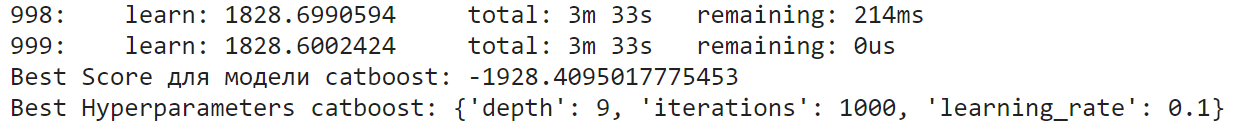

#### Light GBM

In [ ]:
features_train_ohe

,registrationyear,power,kilometer,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_no,notrepaired_unknown,notrepaired_yes
0,1.382311,0.499965,0.585179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.220200,-0.773003,-0.079811,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.360855,-0.120607,0.585179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.365464,-1.727728,0.585179,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.360855,0.865943,0.585179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87078,0.074936,2.011614,0.585179,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87079,0.510728,-0.120607,-1.808788,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87080,0.220200,-0.773003,-0.079811,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87081,0.655992,0.993240,0.585179,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
model_gbm = LGBMRegressor(random_state=12345)
  
parameters = {'n_estimators': [500, 1000],
              'num_leaves': [50,80], 
              'learning_rate':[0.05, 0.1, 0.5]}

search = GridSearchCV(estimator=model_gbm, 
                      param_grid=parameters,
                      cv=5, 
                      verbose=False, 
                      scoring='neg_root_mean_squared_error',
                      n_jobs=1)

result = search.fit(features_train, target_train)

print('Best Score для модели Light GBM: %s' % result.best_score_)
print('Best Hyperparameters Light GBM: %s' % result.best_params_)

Best Score для модели Light GBM: -1615.2076905628828
Best Hyperparameters Light GBM: {'learning_rate': 0.05, 'n_estimators': 1000, 'num_leaves': 80}


## Анализ моделей

In [ ]:
def time_rmse (model, features_train, target_train, features_test, target_test):
    start = time.time()
    model.fit(features_train, target_train)
    end = time.time()
    time_to_fit = end - start
    
    start = time.time()
    predictions = model.predict(features_test)
    end = time.time()
    time_to_predict = end - start
    
    rmse = mean_squared_error(target_test, predictions)**0.5
    
    return print(f'Метрика качества (RMSE) модели: {rmse}; Время обучения модели: {time_to_fit}; Скорость предсказания: {time_to_predict}')

<div class="alert alert-block alert-success">
<b>Успех:</b> Хороший помощник

In [ ]:
model = Ridge(fit_intercept=True, normalize=False)
time_rmse(model, features_train_ohe, target_train, features_test_ohe, target_test)

Метрика качсетва (RMSE) модели: 2751.9390673230096; Время обучения модели: 0.5886337757110596; Скорость предсказания: 0.03918766975402832


In [ ]:
model = RandomForestRegressor()
time_rmse(model, features_train_ohe, target_train, features_test_ohe, target_test)

In [ ]:
cat_features = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
model = CatBoostRegressor(cat_features = cat_features, 
                          loss_function="RMSE",
                          depth=9, 
                          iterations=1000, 
                          learning_rate=0.1,
                          verbose=False)
time_rmse(model, features_train, target_train, features_test, target_test)

Метрика качсетва (RMSE) модели: 1665.3076264902961; Время обучения модели: 162.74226450920105; Скорость предсказания: 0.5012426376342773


In [ ]:
model = LGBMRegressor(learning_rate=0.05, n_estimators=1000, num_leaves=80)
time_rmse(model, features_train, target_train, features_test, target_test)

Метрика качества (RMSE) модели: 1550.0982727553048; Время обучения модели: 13.507150411605835; Скорость предсказания: 6.657202482223511


In [ ]:
result = pd.DataFrame({'model':['Ridge','CatBoostRegressor','LGBMRegressor'],
             'RMSE':[2752,1665,1550],
             'fittime':[0.59,162.74,13.51],
             'predicttime':[0.03,0.50,6.65]})
result

,model,RMSE,fittime,predicttime
0,Ridge,2752,0.59,0.03
1,CatBoostRegressor,1665,162.74,0.50
2,LGBMRegressor,1550,13.51,6.65


##Вывод

Модель линейной регрессии показала ненормальное значение метрики качества RMSE, так как при кодировании переменных методом OHE, модель видит мультиколлинеарность среди признаков и считает значение некорректно. Для этого есть модель Ridge, которая не зависит от мультиколлинеарности в кодированных переменных.

Лучшее значение метрики качества RMSE показала модель Light GBM. Значение модели CatBoost немного хуже, но все же гораздо лучше чем значения моделей линейной регрессии. Можно утверждать, что бустинговые модели дют лучший результат. 

Однако, самая высокая скорость обучения и предсказания у модели линейной регрессии Ridge. Но так как метрика качества у нее самая высокая - нельзя назвать ее лучшей.

Хоть у CatBoost скорость предсказания самая лучшая, модель Light GBM показала лучший результат метрики качсетва и скорости обучения. Поэтому я бы выбрала именно эту модель для продакшна.

<div class="alert alert-block alert-success">
    
<b>Успех:</b> Хорошо проделаны шаги! <br> Кросс-валидация успешно применена <br> Радует большое количество рассмотренных моделей и то, что был попробован внутренний метод кодировки данных <br> Все нужные метрики успешно вычислены и проанализированы   <br> Приятно видеть информативную таблицу



<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Как я тебе уже говорил, для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..
 

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей